In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
with np.load('./cache/test_plane_complex.npz') as render_data:
    dico_renders = dict(render_data.items())
    
imgs = dico_renders['renders']
imgs[imgs<0.0] = 0.0
imgs[imgs>1.0] = 1.0

settings = dico_renders['settings']

print('Renders shape: ', imgs.shape)
print('Settings shape: ', settings.shape)

Renders shape:  (4, 256, 256, 4)
Settings shape:  (4, 6)


In [3]:
with np.load('./datasets/render_dataset_shared_r1280_s128_n4.npz') as render_data:
    dico_renders = dict(render_data.items())

imgs_test = dico_renders['renders']
imgs_test[imgs_test>1.0] = 1.0
imgs_test[imgs_test<0.0] = 0.0

labels_test = dico_renders['labels']

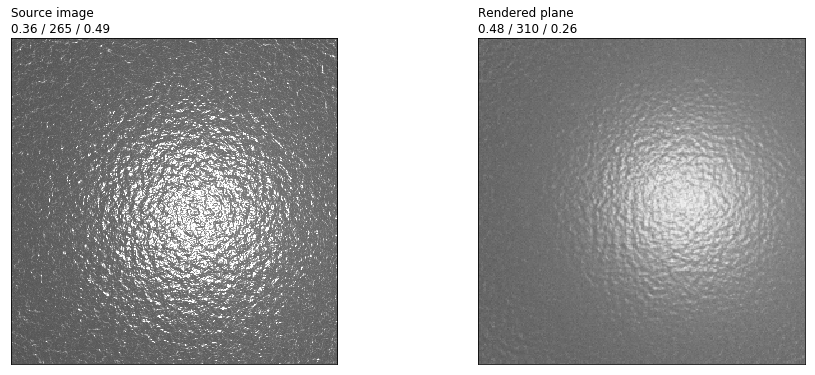

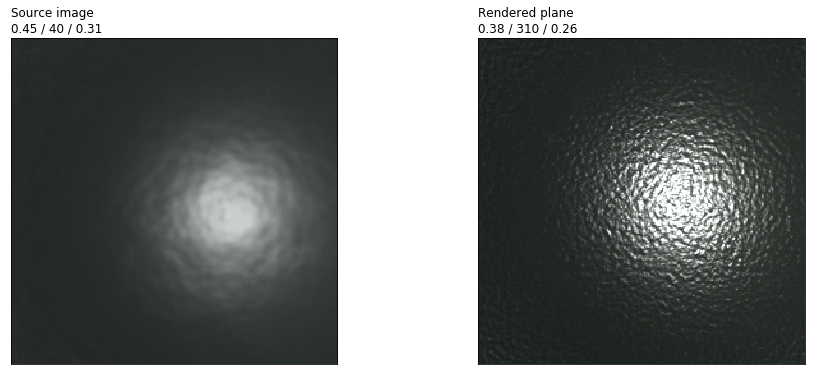

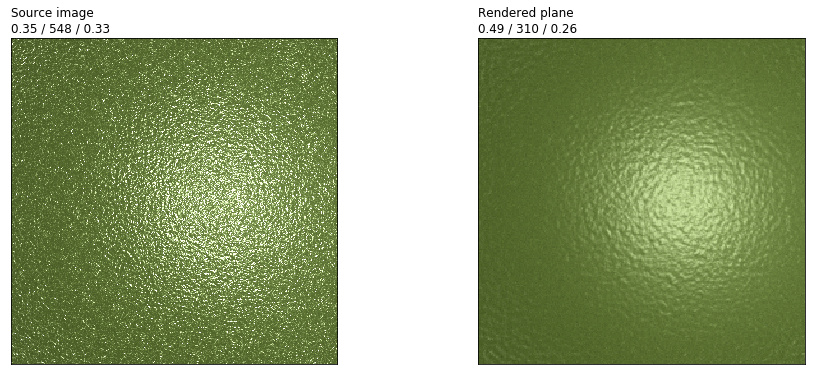

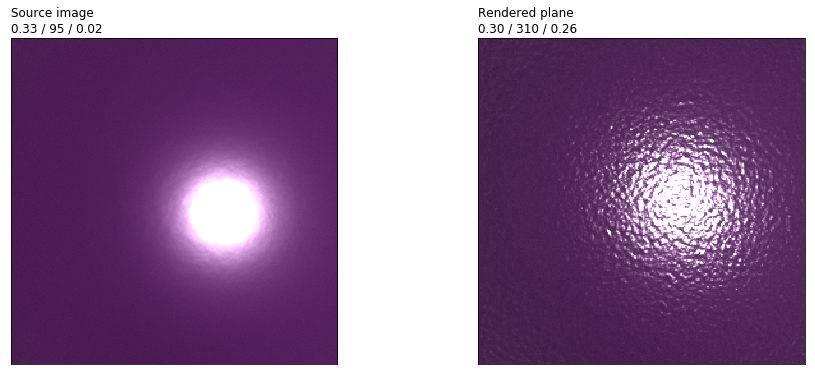

In [5]:
def plot_visualize(k, img):
    fig = plt.figure(figsize=(16,6))
    plt.subplots_adjust(wspace=0.1, hspace=0.2)
    
    # Rendered planes
    ax = fig.add_subplot(122)
    ax.set_title('Rendered plane\n{:.2f} / {:.0f} / {:.2f}'.format(settings[k,3], settings[k,4], settings[k,5]), loc='left')
    ax.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Test images
    im = imgs_test[k]
    im = np.asarray(im)#/255
    ax = fig.add_subplot(121)
    ax.imshow(im)
    ax.set_title('Source image\n{:.2f} / {:.0f} / {:.2f}'.format(labels_test[k,3], labels_test[k,4], labels_test[k,5]), loc='left')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    plt.show()
    
for k, img in enumerate(imgs):
    plot_visualize(k, img)